# DigiCAP UCC Capstone Project. 

## The Goal of this Project is to use Monte Carlo Simulation to Predict the Closing Stock Price of Ghana Oil Company Ltd (GOIL). 

## Historical Data From November 16 2007 to August 23 2022 was downloded for the analysis.
## Goil was enlisted on the Ghana Stock Exchange on 16th November, 2007.
## Source of Data is from Ghana Stock Exchange Database

## The Ghana Stock Exchage opens for trading five days a week. Mondays to Fridays excluding holidays. Five hours a day, 10am to 3pm
## Approximately the Exchange trades for 250 days a year

### Importing the Needed Libraries and Loading the Dataset into Jupyter

In [2]:
#importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
%matplotlib inline

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
import os

import warnings
warnings.filterwarnings('ignore')



### Importing, Examining and Cleaning the data

In [3]:
#file directory
os.chdir (r"C:\Users\LENOVO\Desktop\Digicap\data bank")

#Loading the data set into jupyter
goil = pd.read_csv('goil_data_for_capstone.csv')

In [4]:
#examining the first 5 rows of the dataset
goil.head()

,Date,Share Code,Year High (GHS),Year Low (GHS),Previous Closing Price VWAP (GHS),Opening Price (GHS),Closing Price VWAP (GHS),Price Change (GHS),Closing Bid Price (GHS),Closing Offer Price (GHS),Total Shares Traded,Total Value Traded,Last Transaction Price (GHS)
0,2007-11-16,GOIL,0.2153,0.215,0.2000,0.2150,0.2153,0.0153,NaN,NaN,62800,NaN,0
1,2007-11-19,GOIL,0.2153,0.215,0.2153,0.2153,0.2153,0.0000,0.2154,0.0,0,NaN,0
2,2007-11-20,GOIL,0.2153,0.215,0.2153,0.2153,0.2153,0.0000,0.2155,0.0,0,NaN,0
3,2007-11-21,GOIL,0.2260,0.215,0.2153,0.2153,0.2260,0.0107,0.2260,0.0,1090400,NaN,0
4,2007-11-22,GOIL,0.2260,0.215,0.2260,0.2260,0.2260,0.0000,0.2260,0.0,0,NaN,0


In [5]:
#examining the last 5 rows of the dataset
goil.tail()

,Date,Share Code,Year High (GHS),Year Low (GHS),Previous Closing Price VWAP (GHS),Opening Price (GHS),Closing Price VWAP (GHS),Price Change (GHS),Closing Bid Price (GHS),Closing Offer Price (GHS),Total Shares Traded,Total Value Traded,Last Transaction Price (GHS)
3624,2022-08-17,GOIL,1.82,1.79,1.79,1.79,1.79,0.0,NaN,1.79,0,0,1.79
3625,2022-08-18,GOIL,1.82,1.79,1.79,1.79,1.79,0.0,NaN,1.79,0,0,1.79
3626,2022-08-19,GOIL,1.82,1.79,1.79,1.79,1.79,0.0,NaN,1.79,20,35.8,1.79
3627,2022-08-22,GOIL,1.82,1.79,1.79,1.79,1.79,0.0,NaN,1.79,0,0,1.79
3628,2022-08-23,GOIL,1.82,1.79,1.79,1.79,1.79,0.0,NaN,1.79,0,0,1.79


### Performing basic statistical descriptives on the data show that:
#### 1. the mean closing stock for goil is GHS 1.25 with standard deviation of GHS 0.96
#### 2. The minimum price is 0.14 and a maximum price of 5.01.
#### 3. This leads to a range of GHs 4.87
#### 4. The price dropped by as low as 0.37 at some point and rose by 1.59 at some other time

In [6]:
#looking at the statistical summary of the data set
goil.describe()

,Year High (GHS),Year Low (GHS),Previous Closing Price VWAP (GHS),Opening Price (GHS),Closing Price VWAP (GHS),Price Change (GHS),Closing Bid Price (GHS),Closing Offer Price (GHS)
count,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,2310.000000,2584.000000
mean,1.448337,1.060518,1.247194,1.246633,1.247439,0.001631,1.025457,3.885404
std,1.205101,0.834795,0.964101,0.963641,0.964143,0.045487,0.906220,135.718681
min,0.170000,0.020000,0.140000,0.140000,0.140000,-0.370000,0.000000,0.000000
25%,0.340000,0.300000,0.330000,0.330000,0.330000,0.000000,0.300000,0.320000
50%,1.440000,1.050000,1.120000,1.120000,1.120000,0.000000,0.900000,1.000000
75%,1.780000,1.500000,1.700000,1.700000,1.700000,0.000000,1.500000,1.700000
max,5.050000,4.350000,5.010000,5.010000,5.010000,1.590000,5.000000,6900.000000


### The shares of goil was traded on the exchange for 3,629 days with 13 features

In [7]:
#looking at the number of rows and columns of the data set
print('There are',goil.shape,'rows and columns in your dataset.')

There are (3629, 13) rows and columns in your dataset.


In [8]:
goil.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3629 non-null   object 
 1   Share Code                         3629 non-null   object 
 2   Year High (GHS)                    3629 non-null   float64
 3   Year Low (GHS)                     3629 non-null   float64
 4   Previous Closing Price VWAP (GHS)  3629 non-null   float64
 5   Opening Price (GHS)                3629 non-null   float64
 6   Closing Price VWAP (GHS)           3629 non-null   float64
 7   Price Change (GHS)                 3629 non-null   float64
 8   Closing Bid Price (GHS)            2310 non-null   float64
 9   Closing Offer Price (GHS)          2584 non-null   float64
 10  Total Shares Traded                3626 non-null   object 
 11  Total Value Traded                 924 non-null    objec

In [9]:
#finding the number of null values in each column in the dataset
goil.isna().sum()


Date                                    0
Share Code                              0
Year High (GHS)                         0
Year Low (GHS)                          0
Previous Closing Price VWAP (GHS)       0
Opening Price (GHS)                     0
Closing Price VWAP (GHS)                0
Price Change (GHS)                      0
Closing Bid Price (GHS)              1319
Closing Offer Price (GHS)            1045
Total Shares Traded                     3
Total Value Traded                   2705
Last Transaction Price (GHS)            0
dtype: int64

#### The focus of this project will be on GOIL's closing stock price only. This closing price will be used to simulate the possible prices for the next 250 days of trade on the Ghana Stock Exchange. 

#### Even though four columns of the dataset have some null values, their presence will not affect the simulation and prediction.These columns are:
#### a. Closing Bid Price (GHS) 
#### b. Closing Offer Price (GHS), 
#### c. Total Shares Traded and 
#### d. Total Value Traded

In [10]:
#converting the date column from object data type to datetime data type in the form yyyy mm dd
timefmt = "%Y-%m-%d"
goil['Date']=pd.to_datetime(goil['Date'])

#### There are 6 duplicate values in the data that was removed. This should reduce the dimension of the data set to 3623 by 13 

In [11]:
#Checking for duplicate values
print('There are',goil.duplicated().sum(),'duplicate values in the data set')

There are 6 duplicate values in the data set


In [12]:
#removing these duplicate values from the dataset
goil1=goil.drop_duplicates()
goil1

,Date,Share Code,Year High (GHS),Year Low (GHS),Previous Closing Price VWAP (GHS),Opening Price (GHS),Closing Price VWAP (GHS),Price Change (GHS),Closing Bid Price (GHS),Closing Offer Price (GHS),Total Shares Traded,Total Value Traded,Last Transaction Price (GHS)
0,2007-11-16,GOIL,0.2153,0.215,0.2000,0.2150,0.2153,0.0153,NaN,NaN,62800,NaN,0
1,2007-11-19,GOIL,0.2153,0.215,0.2153,0.2153,0.2153,0.0000,0.2154,0.00,0,NaN,0
2,2007-11-20,GOIL,0.2153,0.215,0.2153,0.2153,0.2153,0.0000,0.2155,0.00,0,NaN,0
3,2007-11-21,GOIL,0.2260,0.215,0.2153,0.2153,0.2260,0.0107,0.2260,0.00,1090400,NaN,0
4,2007-11-22,GOIL,0.2260,0.215,0.2260,0.2260,0.2260,0.0000,0.2260,0.00,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,2022-08-17,GOIL,1.8200,1.790,1.7900,1.7900,1.7900,0.0000,NaN,1.79,0,0,1.79
3625,2022-08-18,GOIL,1.8200,1.790,1.7900,1.7900,1.7900,0.0000,NaN,1.79,0,0,1.79
3626,2022-08-19,GOIL,1.8200,1.790,1.7900,1.7900,1.7900,0.0000,NaN,1.79,20,35.8,1.79
3627,2022-08-22,GOIL,1.8200,1.790,1.7900,1.7900,1.7900,0.0000,NaN,1.79,0,0,1.79


In [13]:
#looking at the number of rows and columns of the data set after removing duplicates
print('There are now',goil.shape,'rows and columns in your dataset after droping the duplicates.')

There are now (3629, 13) rows and columns in your dataset after droping the duplicates.


## Visualizations of the stock features: 
### Since the data set is a time series data, line graphs are used to study the trend of the features
#### . Over time the opening stock price was performing well.
#### . But from 2019, the price began to fall. This was hugely due to the effect of the Covid-19.
#### . It can be realised that there has been some improvemnet in the performance from the begining of 2022. 

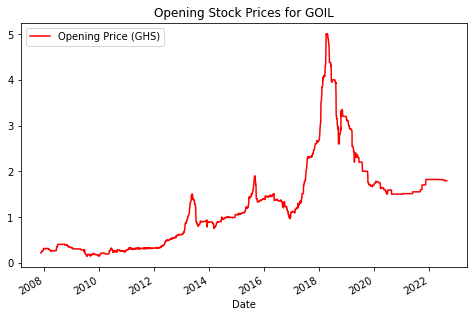

In [14]:
#  Plotting date vs the open market stock price
goil1.plot(x='Date', y='Opening Price (GHS)', figsize=(8,5), color="red")
plt.title('Opening Stock Prices for GOIL')
plt.show()

### The performance of the clossing price also follows that of the openning price. The same attributes equally explain the performance of the closing price. 

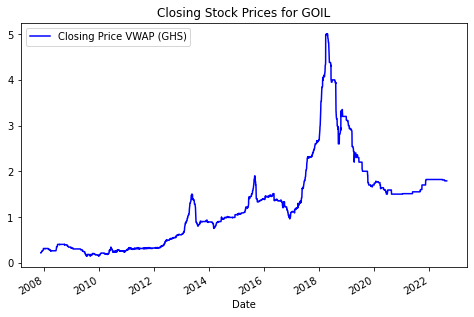

In [15]:
#  Plotting date vs the closing  market stock price
goil1.plot(x='Date', y='Closing Price VWAP (GHS)', figsize=(8,5), color="blue")
plt.title('Closing Stock Prices for GOIL')

plt.show()

### The stock became very volatile from 2019 to 2021 due to the persistent price changes recorded. This could be attributed to the impact of the Covid-19 on the world economy and the capital market. 
### Thi is evident in the rise and fall of the price changes.
### Interestingly, the period of the Covid-19 experience the most volatility from 2018 to 2021

Text(0.5, 1.0, 'Price Change for GOIL in (GHS)')

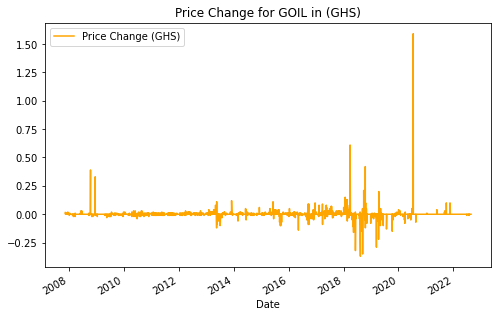

In [16]:
#Plotting the price changes over time
goil1.plot(x='Date', y='Price Change (GHS)', figsize=(8,5), color='orange')
plt.title('Price Change for GOIL in (GHS)')

#### The Year High and Year low all follow the same trend as the prices. 
#### It implies that the outbreak of the Novel Corona Virus impacted the Ghanaaian capital market.

Text(0.5, 1.0, 'Year High for GOIL in (GHS)')

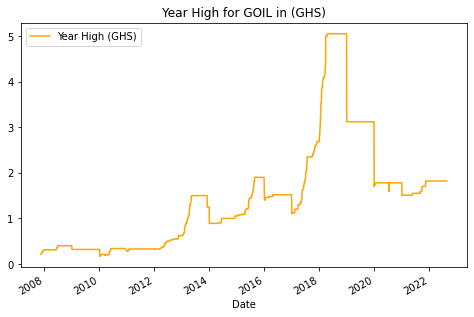

In [17]:
#Plotting the Year High over time
goil1.plot(x='Date', y='Year High (GHS)', figsize=(8,5), color='orange')
plt.title('Year High for GOIL in (GHS)')

Text(0.5, 1.0, 'Year Low for GOIL in (GHS)')

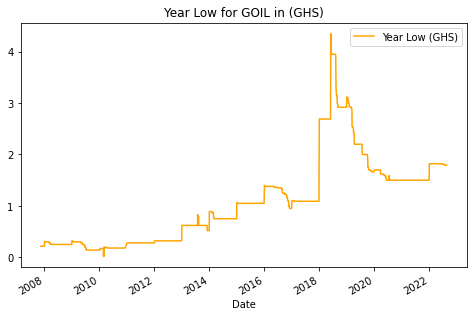

In [18]:
#Plotting the Year Low over time
goil1.plot(x='Date', y='Year Low (GHS)', figsize=(8,5), color='orange')
plt.title('Year Low for GOIL in (GHS)')

In [19]:
#Renaming the closing price vwap (GHS) column to Close for simplicity

nameDict={"Closing Price VWAP (GHS)":"Close"}
goil1=goil1.rename(columns=nameDict)

In [20]:
#selecting the close column for prediction 
goil_df = goil1[['Date','Close']]
goil_df

,Date,Close
0,2007-11-16,0.2153
1,2007-11-19,0.2153
2,2007-11-20,0.2153
3,2007-11-21,0.2260
4,2007-11-22,0.2260
...,...,...
3624,2022-08-17,1.7900
3625,2022-08-18,1.7900
3626,2022-08-19,1.7900
3627,2022-08-22,1.7900


### Goil stock price has been perforning well untill somewhere 2019 when COVID-19 struck. The virus obviously affected most sectors inclusing the capital marktet. The stock has stated picking up begining 2022. 
### This is a good time for investors to invest into Goil because the price has started rising. It has peaked around the begining of 2019 at a price of about GHS 5. Since it is now around GHS2 as at August 2022, we hope it will rise further.

Text(0.5, 1.0, 'Closing Stock Prices for GOIL in GHS')

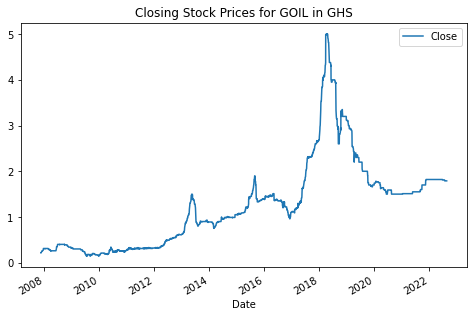

In [21]:
# Plot GOIL closing prices
goil_df.plot(figsize=(8, 5), x='Date', y='Close')
plt.title('Closing Stock Prices for GOIL in GHS', fontsize=12)


### Distributions - Calculate Historical Returns and Statistical Measures
### Since this project seeks to predict closing stock prices, The 'Close' column will be the focus

In [22]:
#Selecting the Close column
goil_close = goil_df[['Close']]
goil_close

,Close
0,0.2153
1,0.2153
2,0.2153
3,0.2260
4,0.2260
...,...
3624,1.7900
3625,1.7900
3626,1.7900
3627,1.7900


### The log return of goil stock indicates that at some points invetors gain and lose at some other times.
### From the graph, it can be seen that goil stock returns for investors has been a little volatile. As shown in the performance of the percentage changes.

<AxesSubplot:>

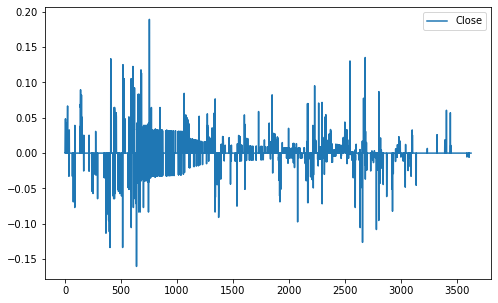

In [23]:
# Calculate historical log returns
log_returns = np.log(1 + goil_close.pct_change())

# Show all the log returns
log_returns.plot(figsize = (8, 5))


### The Log returns is concentrated around 0.0 

<AxesSubplot:ylabel='Density'>

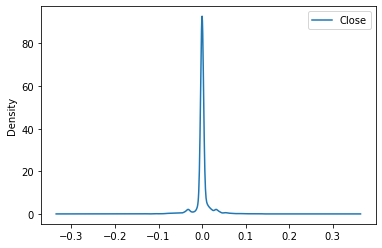

In [24]:
# To show the distribution of the log returns
log_returns.plot.density()

In [25]:
# Calculating key statistical measures for the calculation of the stock price
mean = log_returns.mean()
variance = log_returns.var()
std = log_returns.std()
print(f'The Mean log is: {mean}')
print(f'The Variance log is: {variance}')
print(f'The Standard deviation log is: {std}')

The Mean log is: Close    0.000585
dtype: float64
The Variance log is: Close    0.000304
dtype: float64
The Standard deviation log is: Close    0.017438
dtype: float64


### Simulations - Simulate the Future Daily Returns for investor in goil stocks and Future Prices. 
#### 100 randomly choosen numbers are used to simulate the future daily returns for the next 250 trading days.


<AxesSubplot:ylabel='Density'>

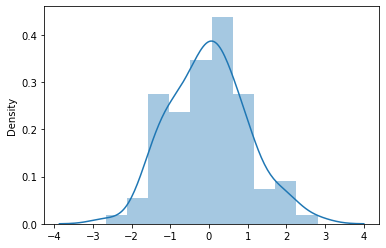

In [26]:
# Generating 100 random numbers betwen 0 and 1.
random_numbers = np.random.rand(100)

# Use those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plot each of the 100 randombly generated numbers from the normal distribution
sn.distplot(normal_random_numbers, bins = 10)

### The Stock Exhange opens from Monday to Fridays excluding holidays.
### Trading on the floor starts at 10am to 3pm each working day. 
### due to this we assumed that trading occurs 250 times hence a time interval of 250 is used for the calculation with the 100 randomy choosen simulation numbes.

In [27]:
# Simulate future daily returns using the above method
t_intervals = 250
simulations = 100

daily_logreturns_simulated = std.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)

# Geting the shape of the simulation 
daily_simplereturns_simulated.shape


(250, 100)

### Using returns, we need to calculate future price progression in each instance of simulation

In [28]:
# Latest known stock price for Goil
last_price = goil_close.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)

# Set the first row to the starting stock price
price_list[0] = last_price

price_list

array([[1.79, 1.79, 1.79, ..., 1.79, 1.79, 1.79],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [29]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_simplereturns_simulated[t]


### The graph shows the worst case scenairo and best case scenario for all 100 instances 

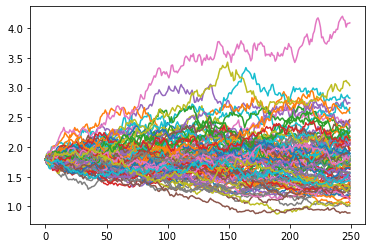

In [30]:
# Ploting the simulated future GOIL stock prices for all 100 instances
plt.plot(price_list)
plt.show()

In [31]:
# Calculating drift. How does the price deviates from the mean
drift = mean - (0.5*variance)

# Simulate future daily returns
t_intervals = 250
simulations = 100

daily_logreturns_simulated = std.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated +drift.values
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

## Quantifications - Examine the worst, average, best scenarios and the probability distribution of each
#### . In the worst case, Goil prices traded around GH0.88
#### . On average case, Goil prices traded around GH2.06
#### . In the best case, Goil prices traded around GH4.07

In [32]:
# Calculate worst, average and best scenarios for GOIL stock price
WorstSim = round(price_list[-1].min(),2)
AvgSim = round(price_list[-1].mean(),2)
BestSim = round(price_list[-1].max(),2)

# Examine the worst, average, and best stock price sceanrios
print("Best and Worst Cases")
print(f"1. Worst Simulation GHS/share: {WorstSim}")
print(f"2. Avg Simulation GHS/share: {AvgSim}")
print(f"3. Best Simulation GHS/share: {BestSim}")


Best and Worst Cases
1. Worst Simulation GHS/share: 0.89
2. Avg Simulation GHS/share: 1.79
3. Best Simulation GHS/share: 4.09


### Confidence Intervals:
#### 1 We are 68% confident that GOIL stock price after 250 days will fall between GHS1.44 and GHS2.67
#### 2  We are 95% confident that GOIL stock price after 250 days will fall between GHS0.83 and GHS3.29

In [33]:
# Set up confidence intervals
Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()

# Considering one standard deviation
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices 
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices

# Considering two standard deviations
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

# Print out the price range within the confidence intervals
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): We are 68% confident that GOIL stock price after 250 days will fall between: GHS{round(LowerInterval_1SD,2)} and GHS{round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D): We are 95% confident that GOIL stock price after 250 days will fall between: GHS{round(LowerInterval_2SD,2)} and GHS{round(UpperInterval_2SD,2)}")


Confidence Intervals
1 Sigma (1 S.D): We are 68% confident that GOIL stock price after 250 days will fall between: GHS1.3 and GHS2.27
2 Sigma (2 S.D): We are 95% confident that GOIL stock price after 250 days will fall between: GHS0.81 and GHS2.76


## Conclusion:

### From the analysis and simulations above, we expect the stock price of ghana Oil Company to perform fairly well in the next year. This is because in the best case scenario, the price is expected to be around GHS 4.07. 
### All things been equal, this will mean that the stock market in Ghana should be picking up. 
### For better decision making concerning whether people should invest in Goil or another stock, a comprehensive analysis should be done on the performance of the other stocks on the market. 